# K-Nearest Neighbors for Classification

In this notebook we discuss the K-Nearest Neighbors for Classification problem. As usual, we start giving the theoretical background and studying the model in details, on order to use it for a practical problem in the Mini-Challenge we proposed in the last section. The structure of the notebook is then:

- [Theoretical Analysis](#s1)
    - [Algorithm](#s1.1)
    
- [Implementation in Python](#s2)
- [Mini-challenge](#s3)

##  <a class="anchor" id='s1'>Theoretical Analysis</a> 

The __k-Nearest Neighbors (kNN)__ algorithm  is a non-parametric method used both for classification and regression.  The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data. 
Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits and satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

As we said, Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

###  <a class="anchor" id='s1.1'>Algorithm</a> 

Suppose we have training set $\mathcal{T}=\{(X_1,y_1),\cdots,(X_n,y_n)\}$ taking values in $\mathbf{R}^p\times \mathcal{G}$ where $\mathcal{G}$ is some classe set. We define some norm $||\cdot||$ on the space of the features, in this case on $\mathbf{R}^p$. 

Given a new unseen point $X$ we reorder the training data such that

\begin{align}
||X_{(1)}-X||\le\cdots\le||X_{(n)}-X||
\end{align}

Once we chose the value $k$ of the algorithm we keep the first $k$ points $X_{(1)},\cdots X_{(k)}$ closest to the point $X$ and the new output $y$ will be the mode of the outputs $y_{(1)},\cdots y_{(k)}$ in case of classifiction. In case of regression will be the mean. 


The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a test point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. 

The main hyperparamter to tune is $k$ and can be accomplished by using some kind of Cross-Validation method. The best choice of $k$ depends upon the data; generally, larger values of $k$ reduces effect of the noise on the classification, but make boundaries between classes less distinct. A good $k$ can be selected by various heuristic techniques.

The accuracy of the k-NN algorithm can be severely degraded by the presence of noisy or irrelevant features, or if the feature scales are not consistent with their importance. Much research effort has been put into selecting or scaling features to improve classification. 

##  <a class="anchor" id='s2'>Implementation in Python</a> 

The class `KNeighborsClassifier` of the module `sklearn.neighbors` is:

`KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)`

Since it's a class is composed by __parameters__, __attributes__ and __method__. The official page where all the details can be found is [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

##  <a class="anchor" id='s3'>Mini-challenge</a> 

We still study in this mini challenge the standard dasaset of Iris classification.  As in the previous cases we structure the section as follows:

- __Inizialization__
- __Exploration of Data__
- __Model Selection__
- __Model Assessment__
- __Interpretability__

### Inizialization

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, info_plots, get_dataset
from sklearn.utils.random import sample_without_replacement


import warnings
warnings.filterwarnings("ignore")

### Exploration of Data

In [2]:
df=pd.read_csv('data/heart.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
num_feat=['age', 'trestbps', 'chol', 'thalach','oldpeak','target']
cat_feat=['sex','fbs','exang','cp','restecg','slope','ca','thal','target']

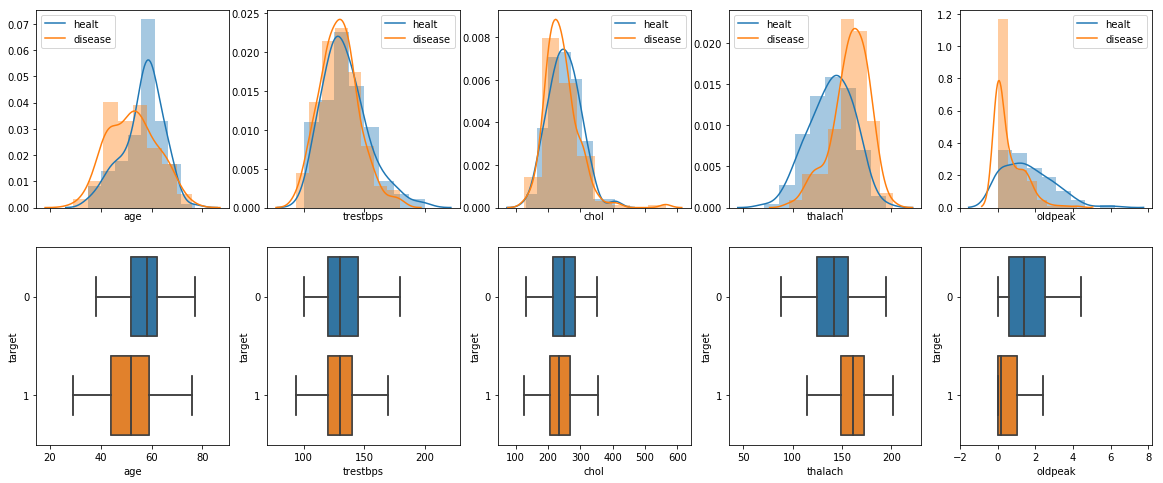

In [6]:
f1, ax1 = plt.subplots(2, 5, figsize=(20, 8), sharex='col', sharey=False)

f1=sns.distplot(df[(df.target==0)][num_feat[0]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,0])
f1=sns.distplot(df[(df.target==1)][num_feat[0]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,0])
f1=sns.boxplot(x=num_feat[0], y='target', data=df,ax=ax1[1,0],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[0], y='target', data=df,ax=ax1[1,0],orient='h',showfliers=False)

f1=sns.distplot(df[(df.target==0)][num_feat[1]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,1])
f1=sns.distplot(df[(df.target==1)][num_feat[1]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,1])
f1=sns.boxplot(x=num_feat[1], y='target', data=df,ax=ax1[1,1],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[1], y='target', data=df,ax=ax1[1,1],orient='h',showfliers=False)

f1=sns.distplot(df[(df.target==0)][num_feat[2]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,2])
f1=sns.distplot(df[(df.target==1)][num_feat[2]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,2])
f1=sns.boxplot(x=num_feat[2], y='target', data=df,ax=ax1[1,2],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[2], y='target', data=df,ax=ax1[1,2],orient='h',showfliers=False)

f1=sns.distplot(df[(df.target==0)][num_feat[3]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,3])
f1=sns.distplot(df[(df.target==1)][num_feat[3]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,3])
f1=sns.boxplot(x=num_feat[3], y='target', data=df,ax=ax1[1,3],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[3], y='target', data=df,ax=ax1[1,3],orient='h',showfliers=False)

f1=sns.distplot(df[(df.target==0)][num_feat[4]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,4])
f1=sns.distplot(df[(df.target==1)][num_feat[4]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,4])
f1=sns.boxplot(x=num_feat[4], y='target', data=df,ax=ax1[1,4],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[4], y='target', data=df,ax=ax1[1,4],orient='h',showfliers=False)

### Model Selection

In [8]:
scaler = StandardScaler()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    scaler.fit_transform(df.drop('target',axis=1)), df.target, shuffle=True, train_size=0.8, random_state=42)

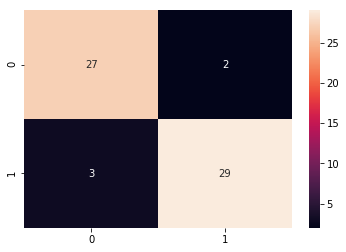

In [10]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)

sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True)

In [11]:
print('The accuracy of the K-NN without feature selection is',accuracy_score(y_test, model.predict(X_test)))

The accuracy of the K-NN without feature selection is 0.9180327868852459


In [12]:
model.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')>

In [34]:
params={'n_neighbors': np.arange(1,30,1), 'weights': ['uniform','distance']  }

model=KNeighborsClassifier()
clf=GridSearchCV(model, param_grid=params,refit=True)

clf.fit(scaler.fit_transform(df.drop('target',axis=1)), df.target)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
clf.best_params_

{'n_neighbors': 22, 'weights': 'uniform'}

In [36]:
clf.best_score_

0.834983498349835

In [37]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=22, p=2,
           weights='uniform')

### Model Assessment

In [40]:
def accur(rep):
    rkf= RepeatedKFold(n_splits=5, n_repeats=rep, random_state=True)
    acc=[]
    
    for train_I, test_I in rkf.split(df):
        X_fold_train = scaler.fit_transform(df.iloc[train_I, :].drop('target',axis=1))
        y_fold_train = df['target'].values[train_I]
        X_fold_test = scaler.fit_transform(df.iloc[test_I, :].drop('target',axis=1))
        y_fold_test = df['target'].values[test_I]
        model = clf.best_estimator_
        model.fit(X_fold_train, y_fold_train)
        acc.append(accuracy_score(y_fold_test, model.predict(X_fold_test)))
    print('The estimation of the accuracy score over the test distributions is:', "{:2.2f}%".format(np.mean(acc)*100), '\u00B1', np.std(acc))
    print("The confidence interval is [{:2.1f}%, {:2.1f}%]".format(*np.quantile(acc, q=[0.025, 0.975]) * 100))
    
    return acc

The estimation of the accuracy score over the test distributions is: 82.03% ± 0.04756914216783455
The confidence interval is [72.1%, 90.2%]


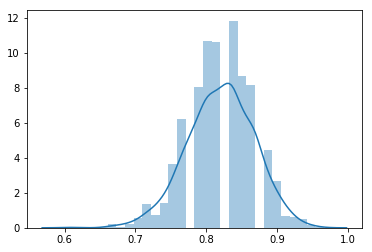

In [42]:
sns.distplot(accur(500),bins=30)